### Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load and clean the dataset

In [5]:
data_path = 'dataset/household_power_consumption.txt'

# Read the dataset with semicolon separator
df = pd.read_csv(
    data_path, 
    sep=';', 
    low_memory=False
)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Combine Date and Time columns into a single datetime object
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Convert numeric columns from string to float
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]
df[numeric_cols] = df[numeric_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Basic analysis

In [8]:
# Group by the hour of day (0-23)
df['Hour'] = df.index.hour
hourly_avg_power = df.groupby('Hour')['Global_active_power'].mean()


# Use resample('M') to get monthly mean
monthly_avg_power = df['Global_active_power'].resample('ME').mean()

# Average values for each sub_metering
sub_metering_avg = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()

In [9]:
print(hourly_avg_power)

Hour
0     0.659434
1     0.539325
2     0.480621
3     0.444866
4     0.443847
5     0.453674
6     0.791600
7     1.502246
8     1.461016
9     1.331645
10    1.260627
11    1.245822
12    1.207075
13    1.144532
14    1.082839
15    0.990760
16    0.948905
17    1.055109
18    1.326451
19    1.733335
20    1.899064
21    1.877697
22    1.412615
23    0.902142
Name: Global_active_power, dtype: float64


### Visualization

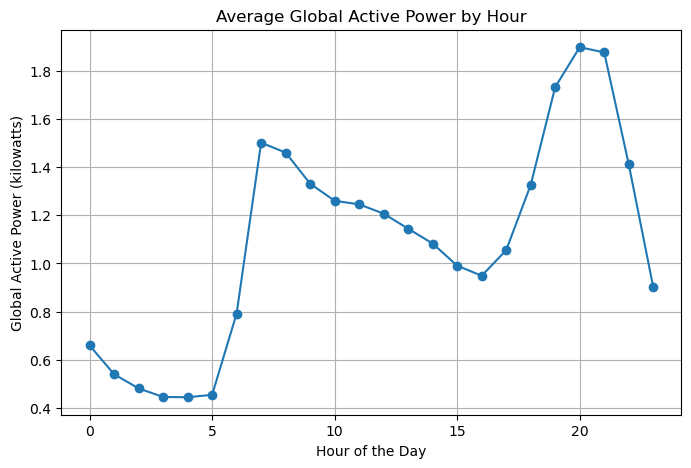

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(hourly_avg_power.index, hourly_avg_power.values, marker='o')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

In [12]:
print(sub_metering_avg)

Sub_metering_1    1.121923
Sub_metering_2    1.298520
Sub_metering_3    6.458447
dtype: float64


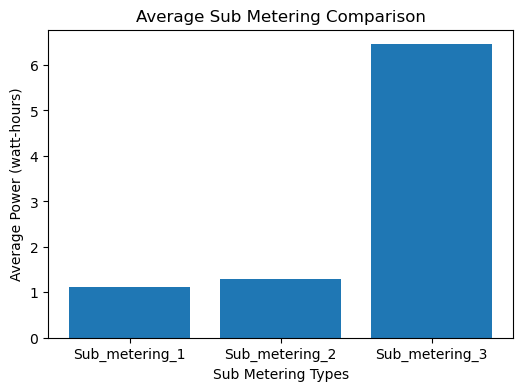

In [13]:
plt.figure(figsize=(6, 4))
plt.bar(sub_metering_avg.index, sub_metering_avg.values)
plt.title('Average Sub Metering Comparison')
plt.xlabel('Sub Metering Types')
plt.ylabel('Average Power (watt-hours)')
plt.show()


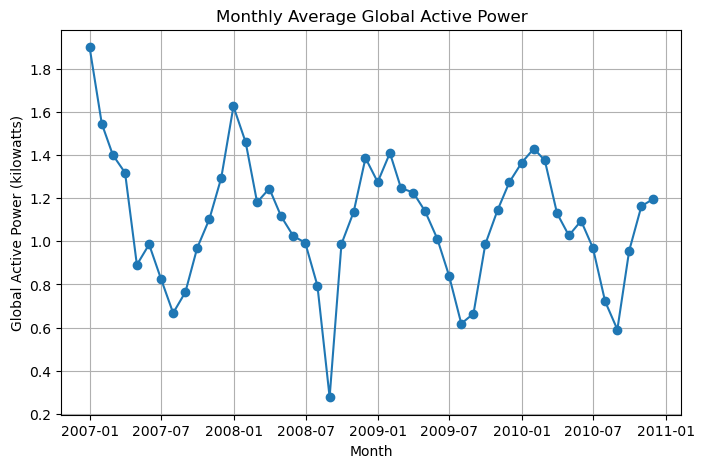

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_power.index, monthly_avg_power.values, marker='o')
plt.title('Monthly Average Global Active Power')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()